# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### This data represents 17 marketing campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# IMPORT DATA LIBRARIES 
import numpy as np 
import pandas as pd 

# IMPORT VIS LIBRARIES 
import seaborn as sns 
import matplotlib.pyplot as plt 

# IMPORT MODELLING LIBRARIES 
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report,confusion_matrix, precision_score, accuracy_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, make_scorer, recall_score, roc_auc_score, roc_curve, auc  
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
pd.set_option('display.max_columns', None)

In [3]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### DISTRIBUTIONS OF CATEGORICAL VARIABLES:

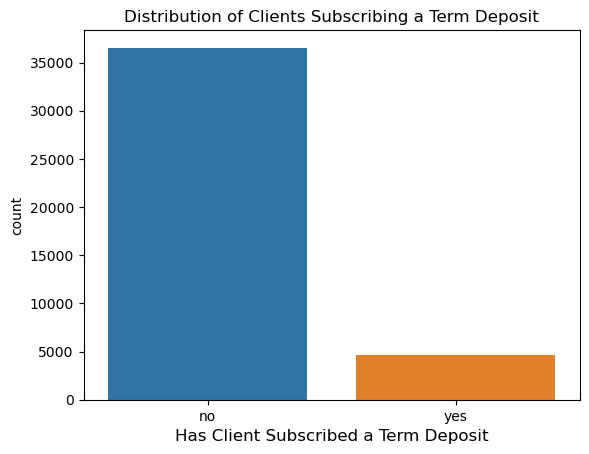

In [6]:
sns.countplot(data=df, x = 'y')
plt.title('Distribution of Clients Subscribing a Term Deposit')
plt.xlabel('Has Client Subscribed a Term Deposit', size=12)

plt.savefig('images/Target_Proportions.png')

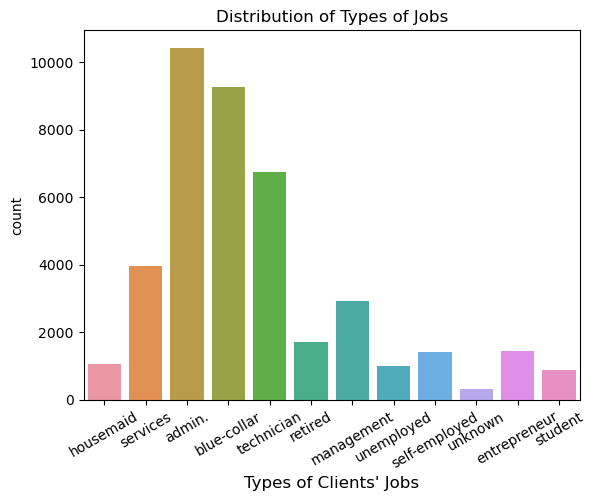

In [7]:
sns.countplot(data=df, x = 'job')
plt.title("Distribution of Types of Jobs")
plt.xlabel("Types of Clients' Jobs", size=12)
plt.xticks(rotation=30)

plt.savefig('images/Job_Proportions.png')

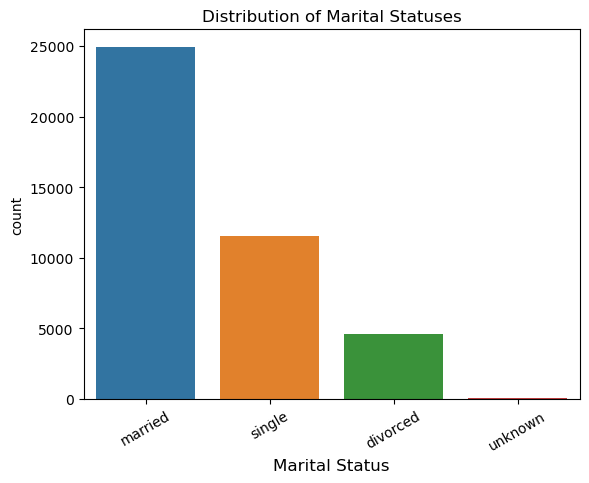

In [8]:
sns.countplot(data=df, x = 'marital')
plt.title("Distribution of Marital Statuses")
plt.xlabel('Marital Status', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Marital_Proportions.png')

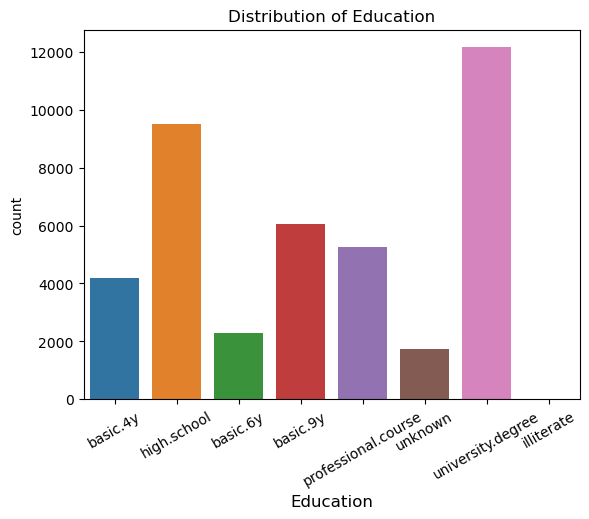

In [9]:
sns.countplot(data=df, x = 'education')
plt.title("Distribution of Education")
plt.xlabel('Education', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Education_Proportions.png')

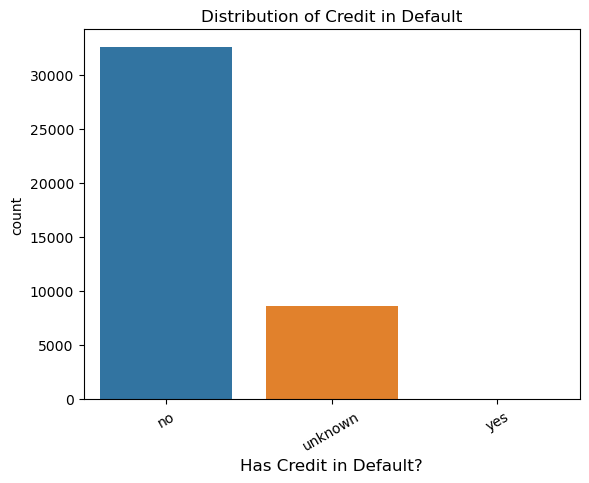

In [10]:
sns.countplot(data=df, x = 'default')
plt.title("Distribution of Credit in Default")
plt.xlabel('Has Credit in Default?', size=12)
plt.xticks(rotation=30)

plt.savefig('images/default_Proportions.png')

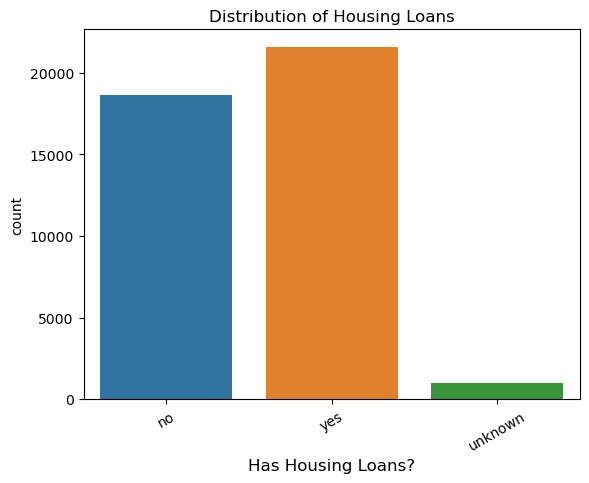

In [11]:
sns.countplot(data=df, x = 'housing')
plt.title("Distribution of Housing Loans")
plt.xlabel('Has Housing Loans?', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Housing_Proportions.png')

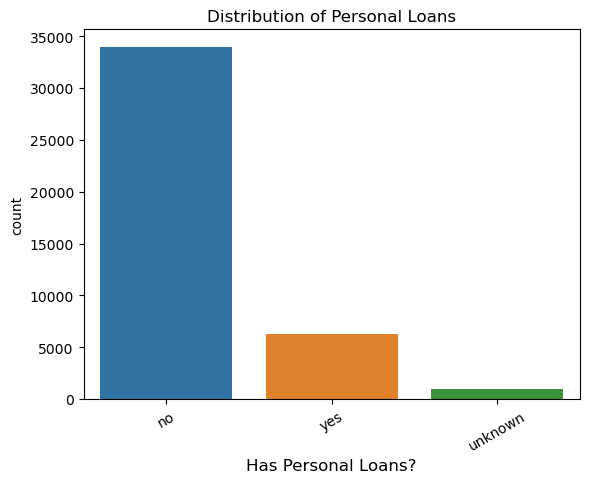

In [12]:
sns.countplot(data=df, x = 'loan')
plt.title("Distribution of Personal Loans")
plt.xlabel('Has Personal Loans?', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Loans_Proportions.png')

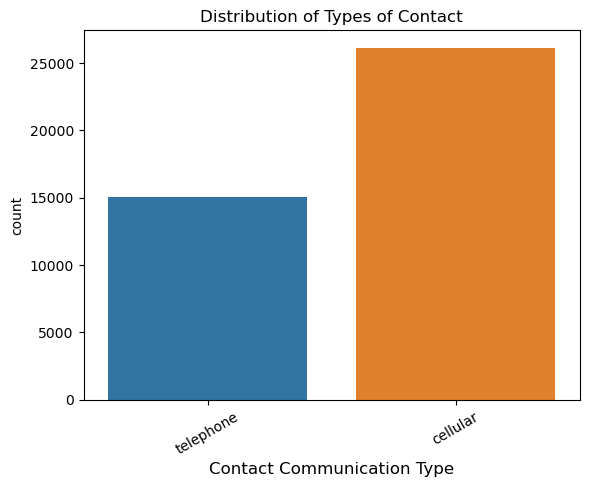

In [13]:
sns.countplot(data=df, x = 'contact')
plt.title("Distribution of Types of Contact")
plt.xlabel('Contact Communication Type', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Contact_Proportions.png')

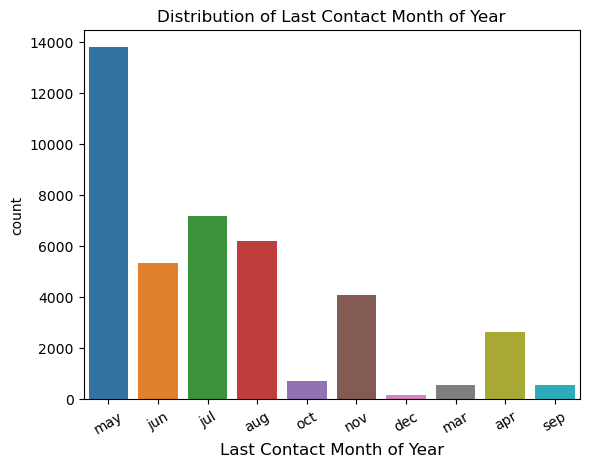

In [14]:
sns.countplot(data=df, x = 'month')
plt.title("Distribution of Last Contact Month of Year")
plt.xlabel('Last Contact Month of Year', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Month_Proportions.png')

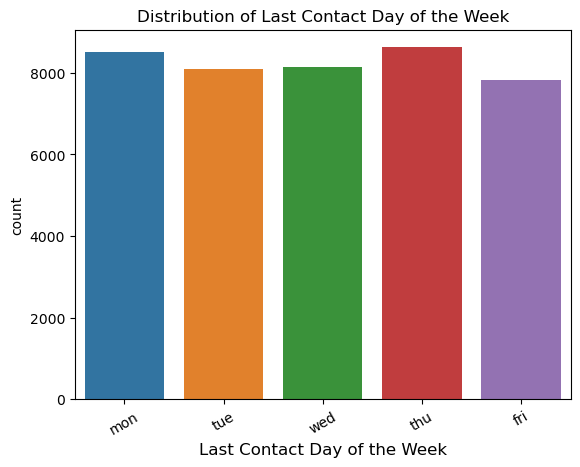

In [15]:
sns.countplot(data=df, x = 'day_of_week')
plt.title("Distribution of Last Contact Day of the Week")
plt.xlabel('Last Contact Day of the Week', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Day_Proportions.png')

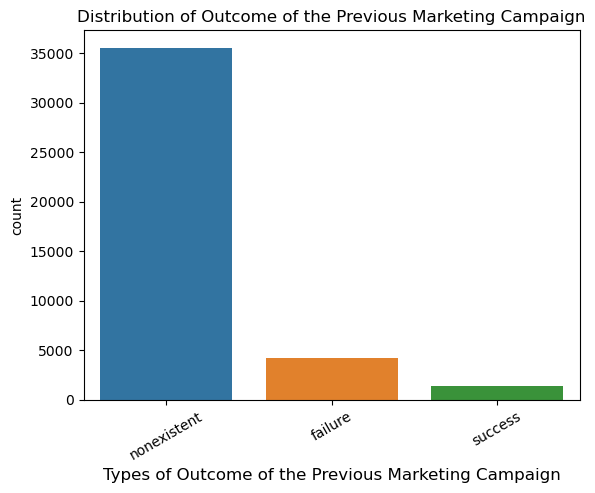

In [16]:
sns.countplot(data=df, x = 'poutcome')
plt.title("Distribution of Outcome of the Previous Marketing Campaign")
plt.xlabel('Types of Outcome of the Previous Marketing Campaign', size=12)
plt.xticks(rotation=30)

plt.savefig('images/Poutcome_Proportions.png')

#### DISTRIBUTIONS OF NUMERIC VARIABLES:

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


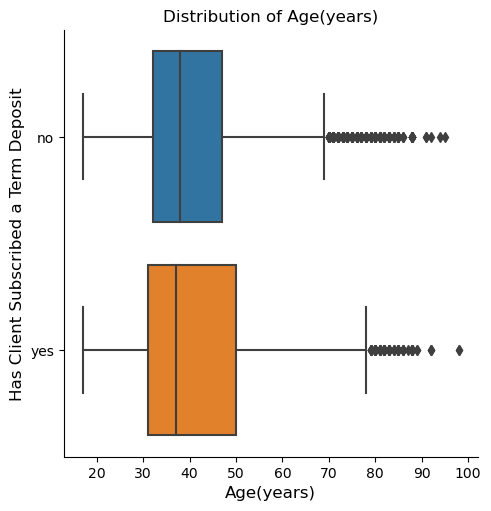

In [17]:
sns.catplot(data=df, x="age", y="y", kind="box")
plt.title('Distribution of Age(years)')
plt.xlabel('Age(years)', size=12)
plt.ylabel('Has Client Subscribed a Term Deposit', size=12)

plt.savefig('images/age_Distribution.png')

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


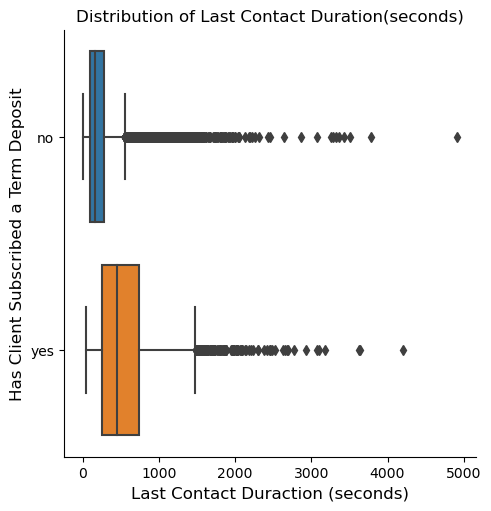

In [18]:
sns.catplot(data=df, x="duration", y="y", kind="box")
plt.title('Distribution of Last Contact Duration(seconds)')
plt.xlabel('Last Contact Duraction (seconds)', size=12)
plt.ylabel('Has Client Subscribed a Term Deposit', size=12)

plt.savefig('images/Duration_Distribution.png')

C:\Users\maha0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


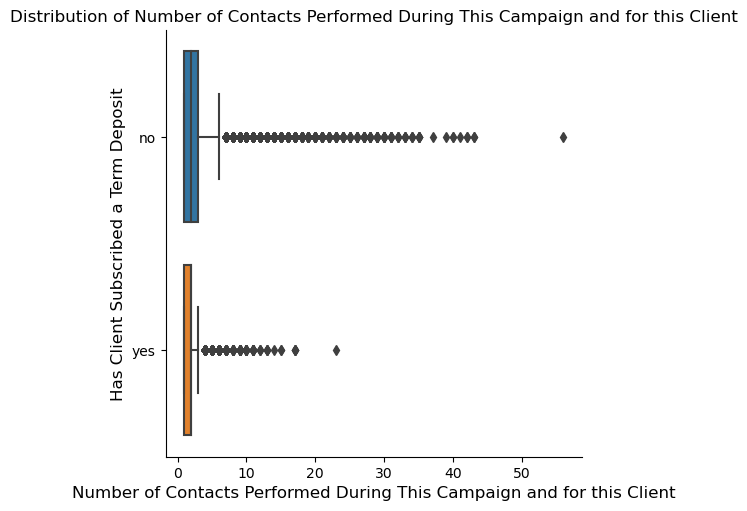

In [19]:
sns.catplot(data=df, x="campaign", y="y", kind="box")
plt.title('Distribution of Number of Contacts Performed During This Campaign and for this Client')
plt.xlabel('Number of Contacts Performed During This Campaign and for this Client', size=12)
plt.ylabel('Has Client Subscribed a Term Deposit', size=12)

plt.savefig('images/Campaign_Distribution.png')

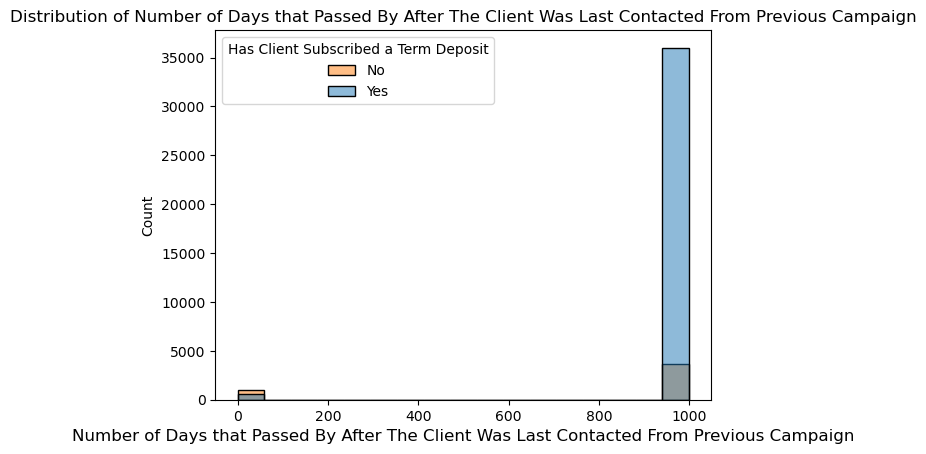

In [20]:
sns.histplot(data=df, x="pdays", hue="y")
plt.title('Distribution of Number of Days that Passed By After The Client Was Last Contacted From Previous Campaign')
plt.xlabel('Number of Days that Passed By After The Client Was Last Contacted From Previous Campaign', size=12)
plt.legend(title='Has Client Subscribed a Term Deposit', loc='upper left', labels=['No', 'Yes'])

plt.savefig('images/pdays_Distribution.png')

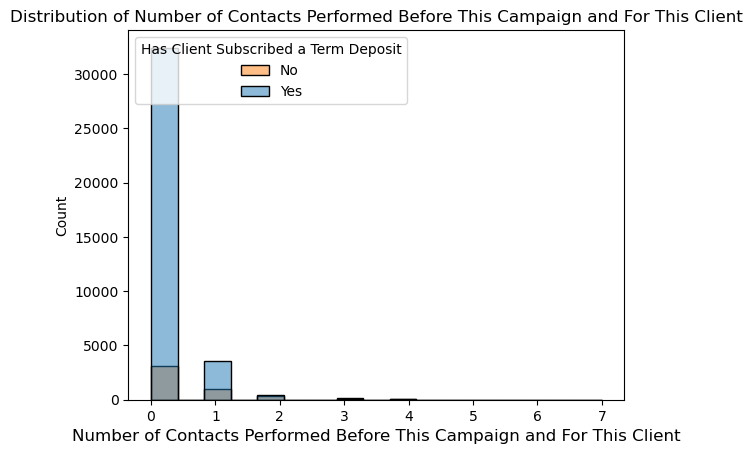

In [21]:
sns.histplot(data=df, x="previous", hue="y")
plt.title('Distribution of Number of Contacts Performed Before This Campaign and For This Client')
plt.xlabel('Number of Contacts Performed Before This Campaign and For This Client', size=12)
plt.legend(title='Has Client Subscribed a Term Deposit', loc='upper left', labels=['No', 'Yes'])

plt.savefig('images/previous_Distribution.png')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### The business objective for this task is to find a model that increases campaign efficiency by determining which factors help to secure clients who subscribe to term deposits. With this task, we aim to find factors that aid in optimizing the utilization of resources and high quality of results.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [22]:
oe_yn = OrdinalEncoder(categories = [['no', 'yes', 'unknown']])
oe_pout = OrdinalEncoder(categories = [['failure', 'nonexistent', 'success']])
oe_job = OrdinalEncoder(categories = [['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown']])
oe_marital = OrdinalEncoder(categories = [['divorced', 'married', 'single', 'unknown']])
oe_educ = OrdinalEncoder(categories = [[ 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown']])
oe_contact = OrdinalEncoder(categories = [['cellular', 'telephone']])
oe_month = OrdinalEncoder(categories = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
oe_day=OrdinalEncoder(categories = [['mon', 'tue', 'wed', 'thu', 'fri']])

df['credit_default']=oe_yn.fit_transform(df[['default']])
df['house']=oe_yn.fit_transform(df[['housing']])
df['personal_loan']=oe_yn.fit_transform(df[['loan']])
df['target']=oe_yn.fit_transform(df[['y']])
df['prev_out']=oe_pout.fit_transform(df[['poutcome']])
df['work']=oe_job.fit_transform(df[['job']])
df['marital_status']=oe_marital.fit_transform(df[['marital']])
df['school']=oe_educ.fit_transform(df[['education']])
df['phone']=oe_contact.fit_transform(df[['contact']])
df['lst_cont_mnth']=oe_month.fit_transform(df[['month']])
df['lst_cont_day']=oe_day.fit_transform(df[['day_of_week']])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,credit_default,house,personal_loan,target,prev_out,work,marital_status,school,phone,lst_cont_mnth,lst_cont_day
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,4.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.0,0.0,0.0,0.0,1.0,7.0,1.0,3.0,1.0,4.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,1.0,0.0,0.0,1.0,7.0,1.0,3.0,1.0,4.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,0.0,1.0,0.0,1.0,7.0,1.0,3.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0,1.0,0.0,1.0,1.0,5.0,1.0,5.0,0.0,10.0,4.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,0.0,10.0,4.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0,1.0,0.0,0.0,1.0,5.0,1.0,6.0,0.0,10.0,4.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0,0.0,0.0,1.0,1.0,9.0,1.0,5.0,0.0,10.0,4.0


In [23]:
df_=df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'credit_default', 'house', 'personal_loan', 'target', 'prev_out', 'work', 'marital_status', 'school', 'phone', 'lst_cont_mnth', 'lst_cont_day']]
df_

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,credit_default,house,personal_loan,target,prev_out,work,marital_status,school,phone,lst_cont_mnth,lst_cont_day
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,4.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,2.0,0.0,0.0,0.0,1.0,7.0,1.0,3.0,1.0,4.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,0.0,0.0,1.0,7.0,1.0,3.0,1.0,4.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,1.0,0.0,1.0,7.0,1.0,3.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0.0,1.0,0.0,1.0,1.0,5.0,1.0,5.0,0.0,10.0,4.0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,0.0,10.0,4.0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0.0,1.0,0.0,0.0,1.0,5.0,1.0,6.0,0.0,10.0,4.0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0.0,0.0,0.0,1.0,1.0,9.0,1.0,5.0,0.0,10.0,4.0


In [24]:
X=df_[['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'credit_default', 'house', 'personal_loan', 'prev_out', 'work', 'marital_status', 'school', 'phone', 'lst_cont_mnth', 'lst_cont_day']]

In [25]:
y=df_['target']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [27]:
y_test.value_counts(normalize = True)

target
0.0    0.887346
1.0    0.112654
Name: proportion, dtype: float64

In [28]:
y_train.value_counts(normalize = True)

target
0.0    0.887346
1.0    0.112654
Name: proportion, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [29]:
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), selector),
                                     remainder = StandardScaler())
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [30]:
lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

lgr_pipe.fit(X_train, y_train)

pipe_1_acc = lgr_pipe.score(X_test, y_test)


In [32]:
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out() 
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)

coef_df.head(20)

,feature,coefs
4,emp.var.rate,1.405630
1,duration,1.168020
5,cons.price.idx,0.618997
7,euribor3m,0.509939
16,phone,0.480901
8,nr.employed,0.413106
12,prev_out,0.314192
6,cons.conf.idx,0.229558
9,credit_default,0.170882
15,school,0.117517


### Problem 9: Score the Model

What is the accuracy of your model?

In [33]:
preds = lgr_pipe.predict(X_test)
accuracy_log = accuracy_score(y_test, preds)

### END SOLUTION

# Answer check
print(f'Accuracy: {accuracy_log: .2f}')

Accuracy:  0.91


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### DECISION TREE:

In [34]:
params = {'max_depth': [5],
         'min_samples_split': [10],
          'criterion': ['entropy'],
          'min_samples_leaf': [10]
         }

In [35]:
dtree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params).fit(X_train, y_train)

In [36]:
best_model=dtree_grid.best_estimator_

preds = dtree_grid.predict(X_test)


In [37]:
train_acc = dtree_grid.score(X_train, y_train)
test_acc = dtree_grid.score(X_test, y_test)
print(f'Training Accuracy: {train_acc: .2f}')
print(f'Test Accuracy: {test_acc: .2f}')

Training Accuracy:  0.91
Test Accuracy:  0.92


In [38]:
accuracy_dtree = accuracy_score(y_test, preds)

### END SOLUTION

# Answer check
print(f'Accuracy: {accuracy_dtree: .2f}')

Accuracy:  0.92


In [39]:
dtree_grid.cv_results_

{'mean_fit_time': array([0.06555276]),
 'std_fit_time': array([0.00800251]),
 'mean_score_time': array([0.00416851]),
 'std_score_time': array([0.00060434]),
 'param_criterion': masked_array(data=['entropy'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'entropy',
   'max_depth': 5,
   'min_samples_leaf': 10,
   'min_samples_split': 10}],
 'split0_test_score': array([0.91115067]),
 'split1_test_score': array([0.91356426]),
 'split2_test_score': array([0.90628035]),
 'split3_test_score': array([0.91146002]),
 'split4_test_score': array([0.9101651])

#### KNN ALGORITHM:

In [48]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [49]:
# Set the parameter grid
params = {
    'knn__n_neighbors': [10]}

In [50]:
# Define scoring function for precision
scoring = make_scorer(recall_score)

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(pipeline, param_grid=params)

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [10]})

In [51]:
best_model = grid_search_knn.best_estimator_

# Predict on test data
y_pred = grid_search_knn.predict(X_test)
y_prob = grid_search_knn.predict_proba(X_test)[:, 1]

In [52]:
train_acc = grid_search_knn.score(X_train, y_train)
test_acc = grid_search_knn.score(X_test, y_test)
print(f'Training Accuracy: {train_acc: .2f}')
print(f'Test Accuracy: {test_acc: .2f}')

Training Accuracy:  0.91
Test Accuracy:  0.91


In [54]:
grid_search_knn.cv_results_

{'mean_fit_time': array([0.04346781]),
 'std_fit_time': array([0.00480057]),
 'mean_score_time': array([1.6106729]),
 'std_score_time': array([0.08094084]),
 'param_knn__n_neighbors': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'knn__n_neighbors': 10}],
 'split0_test_score': array([0.90192588]),
 'split1_test_score': array([0.90385238]),
 'split2_test_score': array([0.90304306]),
 'split3_test_score': array([0.89624474]),
 'split4_test_score': array([0.90029136]),
 'mean_test_score': array([0.90107148]),
 'std_test_score': array([0.00269282]),
 'rank_test_score': array([1])}

#### SVM MODEL:

In [55]:
params = {'kernel': ['linear'],
         'gamma': [0.1]}

In [56]:
svc = SVC().fit(X_train, y_train)
grid_svc = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)

In [57]:
best_model=grid_svc.best_estimator_
preds = best_model.predict(X_test)


In [58]:
accuracy_svm = accuracy_score(y_test, preds)

### END SOLUTION

# Answer check
print(f'Accuracy: {accuracy_svm: .2f}')

Accuracy:  0.91


In [59]:
train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)
print(f'Training Accuracy: {train_acc: .2f}')
print(f'Test Accuracy: {test_acc: .2f}')

Training Accuracy:  0.90
Test Accuracy:  0.91


In [60]:
grid_svc.cv_results_

{'mean_fit_time': array([96.58510308]),
 'std_fit_time': array([20.27466052]),
 'mean_score_time': array([1.20609818]),
 'std_score_time': array([0.02464918]),
 'param_gamma': masked_array(data=[0.1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.1, 'kernel': 'linear'}],
 'split0_test_score': array([0.90419162]),
 'split1_test_score': array([0.90563289]),
 'split2_test_score': array([0.89867271]),
 'split3_test_score': array([0.90320492]),
 'split4_test_score': array([0.89802525]),
 'mean_test_score': array([0.90194548]),
 'std_test_score': array([0.00304327]),
 'rank_test_score': array([1])}

#### MODEL DATAFRAME:

In [62]:
data = [['Decision Tree', 0.066, 0.91, 0.92], ['K-Nearest Neighbors', 0.043, 0.91, 0.91], ['Support Vector Machine', 96.585, 0.90, 0.91]]

# Create the pandas DataFrame
Model_DataFrame = pd.DataFrame(data, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
Model_DataFrame

,Model,Train Time,Train Accuracy,Test Accuracy
0,Decision Tree,0.066,0.91,0.92
1,K-Nearest Neighbors,0.043,0.91,0.91
2,Support Vector Machine,96.585,0.90,0.91


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.

#### With regards to the gender feature, the original dataset did not have such a feature. I believe that this is a good choice as that gender doesnt often play a role with regards to subscriptions to Term Deposits.

#### Decision Tree with increase of Maximum Depth of 15:

In [72]:
params = {'max_depth': [15],
         'min_samples_split': [10],
          'criterion': ['entropy'],
          'min_samples_leaf': [10]
         }

In [73]:
dtree_grid_15 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params).fit(X_train, y_train)

In [74]:
best_model=dtree_grid_15.best_estimator_

preds = dtree_grid_15.predict(X_test)


In [75]:
train_acc = dtree_grid_15.score(X_train, y_train)
test_acc = dtree_grid_15.score(X_test, y_test)
print(f'Training Accuracy: {train_acc: .2f}')
print(f'Test Accuracy: {test_acc: .2f}')

Training Accuracy:  0.94
Test Accuracy:  0.91


In [76]:
accuracy_dtree = accuracy_score(y_test, preds)

### END SOLUTION

# Answer check
print(f'Accuracy: {accuracy_dtree: .2f}')

Accuracy:  0.91


In [77]:
dtree_grid_15.cv_results_

{'mean_fit_time': array([0.11936579]),
 'std_fit_time': array([0.01963179]),
 'mean_score_time': array([0.00422254]),
 'std_score_time': array([0.00070525]),
 'param_criterion': masked_array(data=['entropy'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[15],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'entropy',
   'max_depth': 15,
   'min_samples_leaf': 10,
   'min_samples_split': 10}],
 'split0_test_score': array([0.90289691]),
 'split1_test_score': array([0.90288119]),
 'split2_test_score': array([0.8991583]),
 'split3_test_score': array([0.89705406]),
 'split4_test_score': array([0.90061509

#### Based on the increase of the maximum depth of the Decision Tree, I was able to determine that by increasing the Maximum Depth of the model, the Training Accuracy and Train Time will increase but the Testing Accuracy does decrease slightly.

### Technical Review:

#### Within this task, we were asked to analyze the various features that would optimize a model to help in determining clients who subscribe to term deposits. Our initial baseline model has an Accuracy, both Training and Test, of about 0.887. This is the accuracy that we are comparing the other models' accuracies against.

#### Using Logistic Regression, we are able to obtain an Accuracy of about 0.91. Using this model, we are able to able to obtain the top 5 features that have highest significance in the model, which are Employment Variation Rate, Call Duration, Consumer Price Index, Euribor 3 Month Rate, and Contact Communication Type.

#### In comparison, we also ran a Decision Tree Model, K-Nearest Neighbors Model and Support Vector Machine Model. When running the Decision Tree Model, we received a Training Accuracy of 0.91 and a Testing Accuracy of 0.92. This method was the second shortest to run.
#### When running K-Nearest Neighbors, we received a Training Accuracy of 0.91 and a Testing Accuracy of 0.91. This model was the quickest to run. 
#### Finally, when running the Support Vector Machine Model, we received a Training Accuracy of 0.90 and a Testing Accuracy Model of about 0.91. This model took the longest to run. 